<a href="https://colab.research.google.com/github/kumarlova/Bike-sharing-demand-prediction/blob/main/Copy_of_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

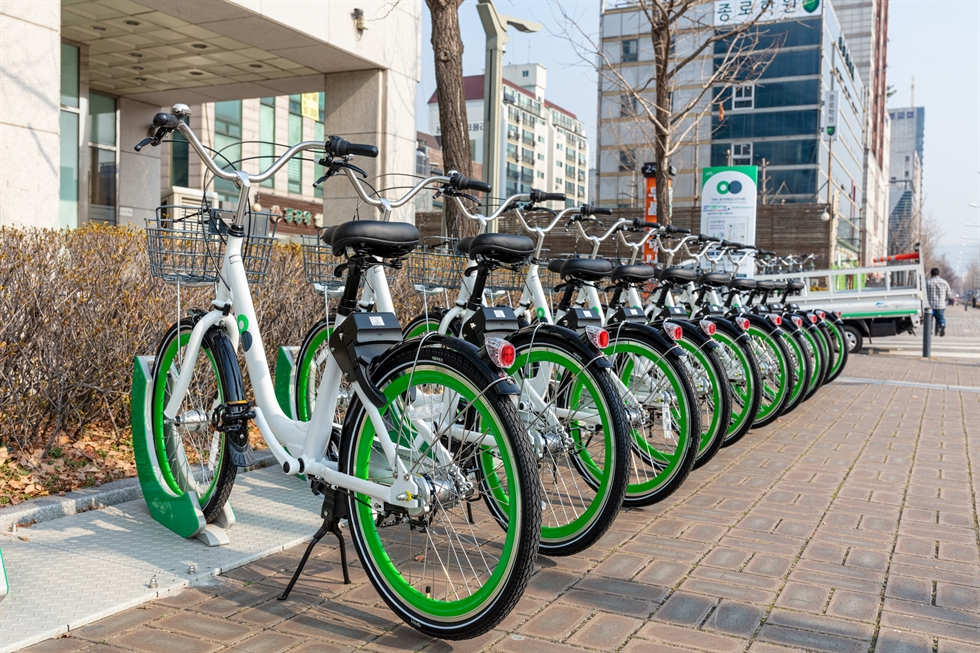

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/bike/Copy of SeoulBikeData.csv", encoding='cp1252')

In [ ]:
df.head(12)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
#Finding non null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
df.shape

(8760, 14)

In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
#Numerical columns
df.describe().columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [ ]:
df.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [ ]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


##Basic Conclusions from Univariate Analysis

Booking are mostly similar throughout the seasons(need to dig more for better understanding) More bookings on non-holiday days & Functioning days. Not much info from hour at the moment. The temperature is mostly >0, for now lets consider seoul on the warmer side. Humidity is also moderate but still on warmer side. Wind speed is not that extreme. Most of the rainfall is <4 mm Snowfall is mostly 0-1 cm and not that extreme in most cases.

In [ ]:
#null values count
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
# Checking the number of unique values in each column
_dict_ = {}
for i in list(df.columns):
  _dict_.update({i:df[i].nunique()})
_dict_

{'Date': 365,
 'Dew point temperature(°C)': 556,
 'Functioning Day': 2,
 'Holiday': 2,
 'Hour': 24,
 'Humidity(%)': 90,
 'Rainfall(mm)': 61,
 'Rented Bike Count': 2166,
 'Seasons': 4,
 'Snowfall (cm)': 51,
 'Solar Radiation (MJ/m2)': 345,
 'Temperature(°C)': 546,
 'Visibility (10m)': 1789,
 'Wind speed (m/s)': 65}

#EDA Analysis

###EDA For Numerical data

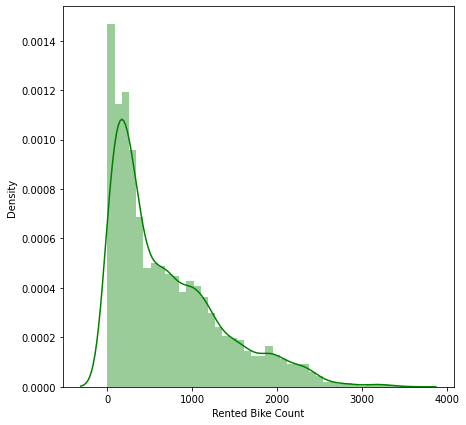

In [ ]:
# Dependent variable 'Price'
plt.figure(figsize=(7,7))
sns.distplot(df['Rented Bike Count'],color="g")

In [ ]:
numeric_features=df.describe().columns
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

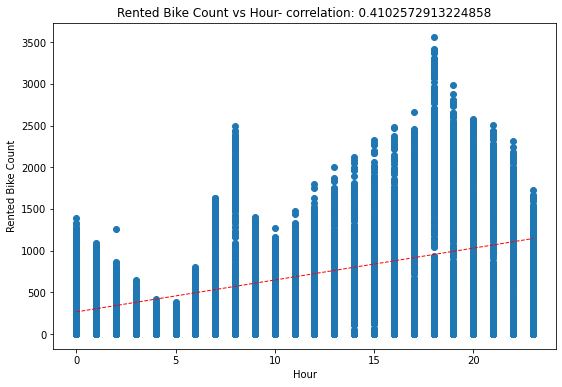

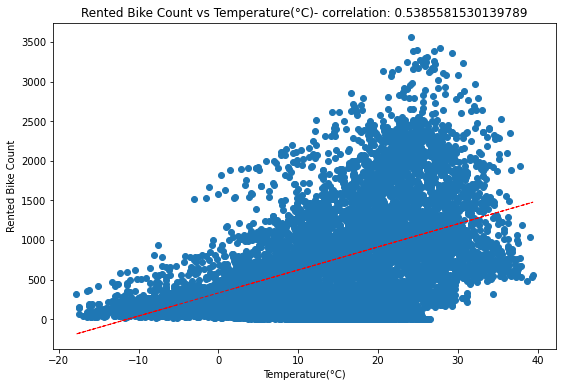

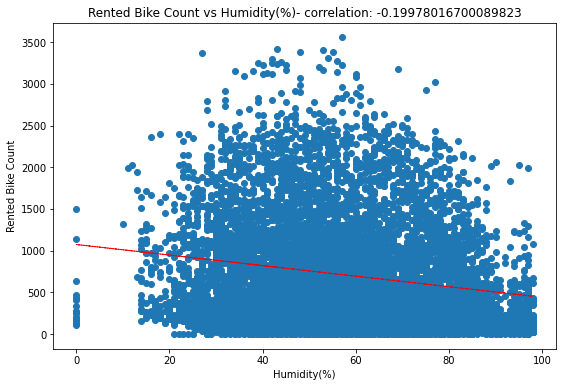

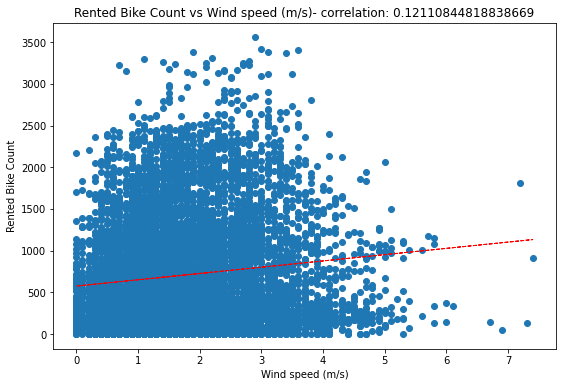

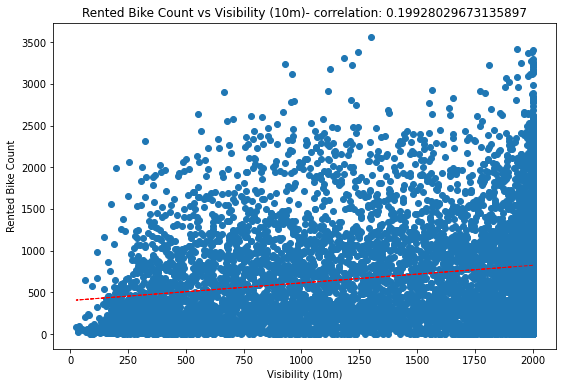

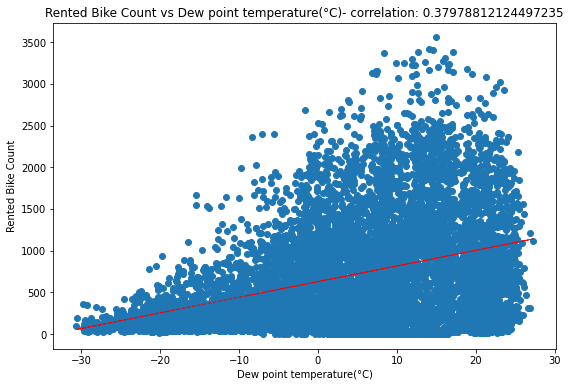

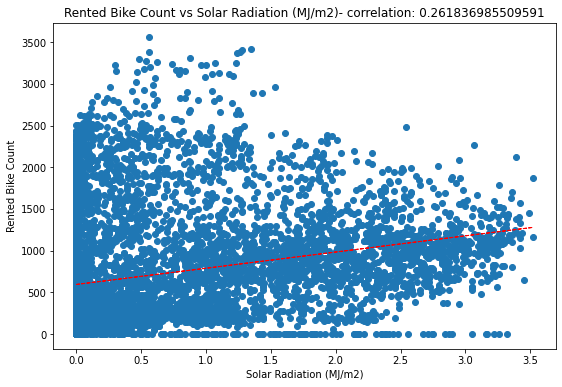

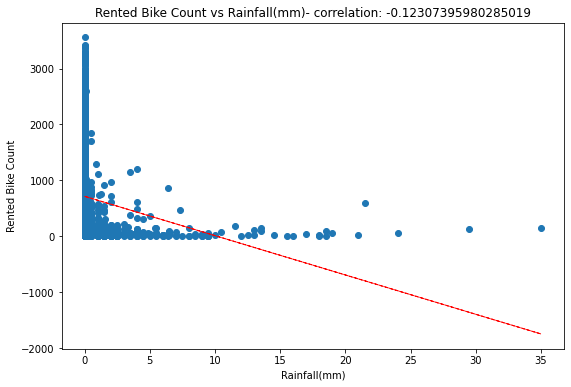

In [ ]:
#Finding the correlation between numerical feature to Rented bike count
for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

###The seasonal movement of bike counts correlates very well with temperature, solar radiation, and humidity. The highest count of rented bikes occurs in summer, while the least occurs in winter.

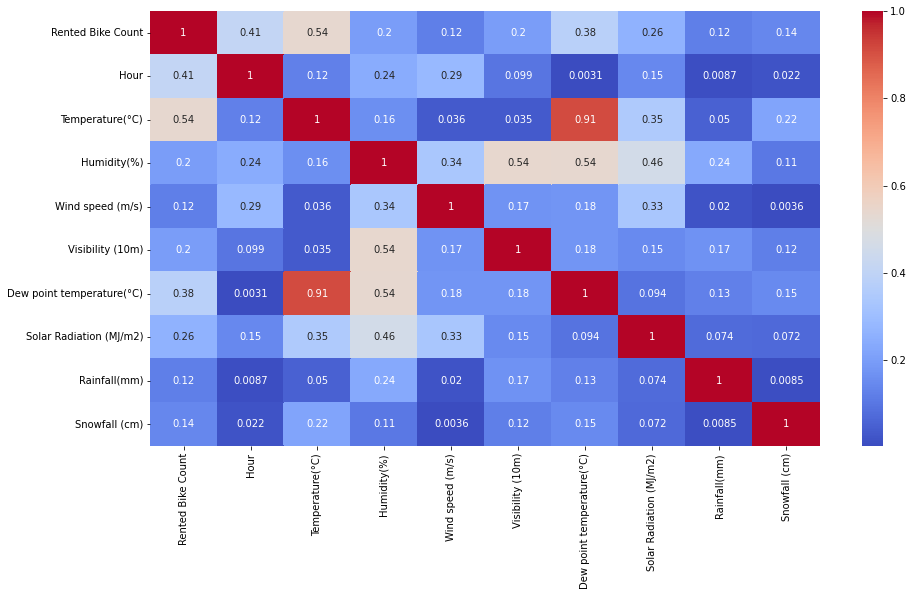

In [ ]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

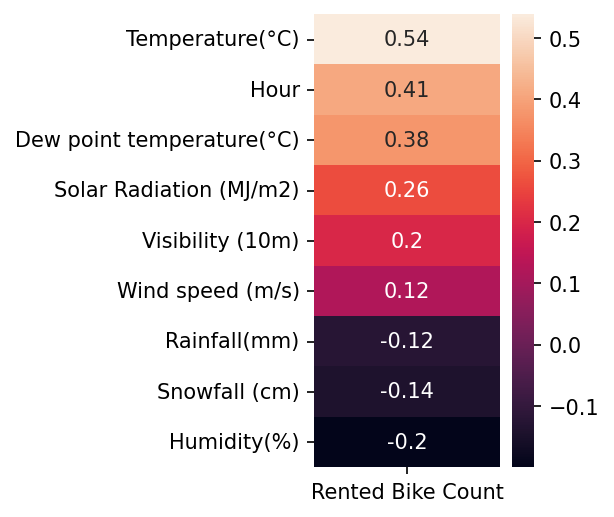

In [ ]:
#Individual correlation between Rented Bike Count vs Numerical data in ascending oreder
plt.figure(figsize=(2,4), dpi=150)
sns.heatmap(df.corr()[["Rented Bike Count"]].sort_values
            (by="Rented Bike Count", ascending=False)[1:],annot=True)

###*  One common thing to understand how a dependent variable is influenced by numerical features is to find a correlation matrix between them.
### *“temp” and “humidity” features have positive and negative correlation with count respectively. Although the correlations between them are not very prominent, still the count variable has got little dependency on “temp” and “humidity”.
### *“windspeed” is not going to be a really useful numerical feature and that is visible from the correlation value with “count”.
### *“Dew point tempereture” variable  and “temp” has strong correlation with each other. During model building any one of the variables has to be dropped since they will exhibit multicollinearity in the data.


<Figure size 576x432 with 0 Axes>

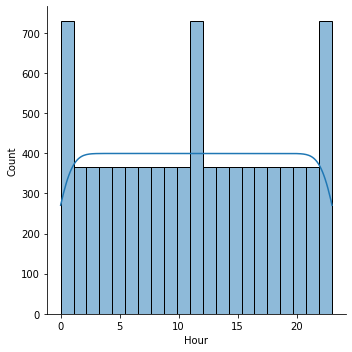

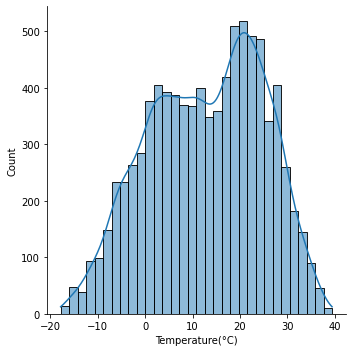

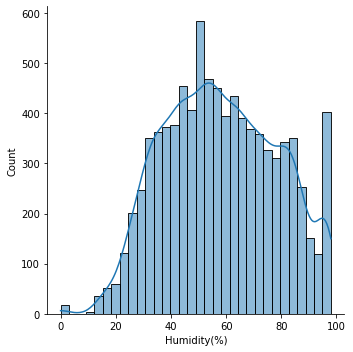

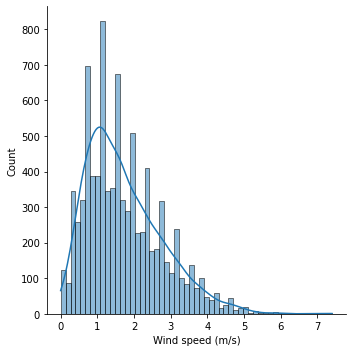

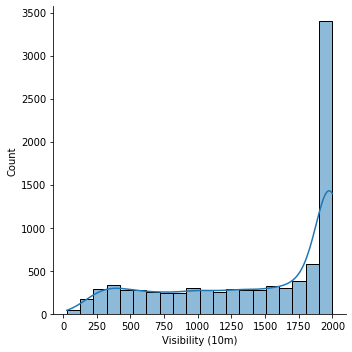

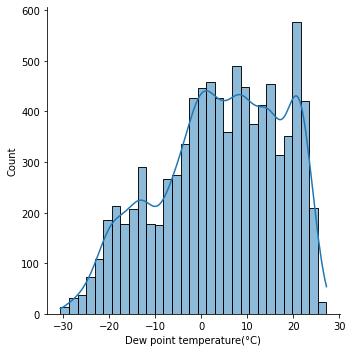

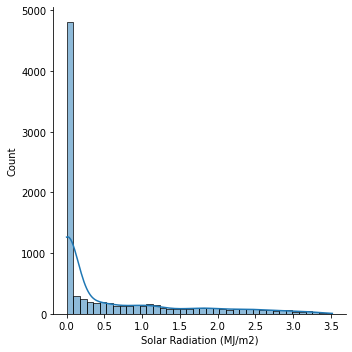

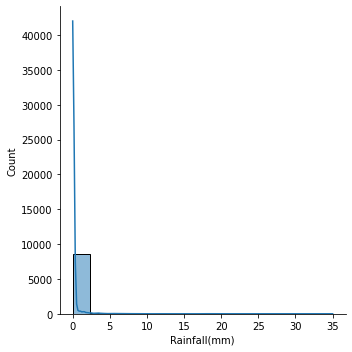

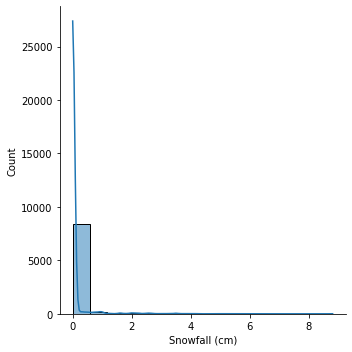

In [ ]:
plt.figure(figsize=(8,6))
lis=['Hour','Temperature(°C)',	'Humidity(%)',	'Wind speed (m/s)',	'Visibility (10m)',	'Dew point temperature(°C)',	'Solar Radiation (MJ/m2)',	'Rainfall(mm)','Snowfall (cm)']

for i in lis:
  sns.displot(df[i],kde=True)

###Basic Conclusions from Univariate Analysis

Booking are mostly similar throughout the seasons(need to dig more for better understanding) More bookings on non-holiday days & Functioning days(well working days). Not much info from hour at the moment. The temperature is mostly >0, for now lets consider seoul on the warmer side. Humidity is also moderate but still on warmer side. Wind speed is not that extreme. Most of the rainfall is <4 mm Snowfall is mostly 0-1 cm and not that extreme in most cases.



##Date

In [ ]:
#Converting the Date column in Datetime Dtype
df['Date']=pd.to_datetime(df['Date'])

#Breaking Down the Date into 3 Components
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018
8759,2018-11-30,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018


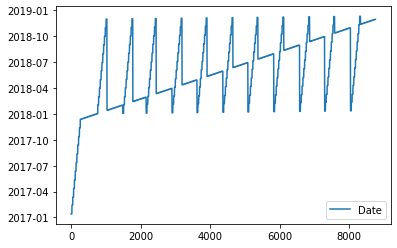

In [ ]:
df.plot(y='Date')

In [ ]:
df['Date']=pd.to_datetime(df['Date'])
days = [date.weekday() for date in df['Date']]
months = [date.month for date in df['Date']]


df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017


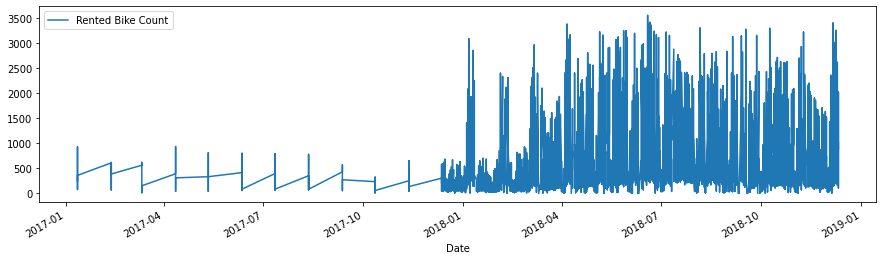

In [ ]:
df.plot(x='Date', y='Rented Bike Count', figsize=(15,4))

###In general, the number of bike rents in 2017 was less than in 2018. The bike rents peaked in July 2018 then reduced slightly until December 2018.

In [ ]:
# Create days and months as new features
dates = df.Date
days = [date.weekday() for date in dates]
months = [date.month for date in dates]


df['Day'] = days
df['Month'] = months


df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,1,2017
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,1,2017
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,3,1,2017
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,1,2017
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,1,2017


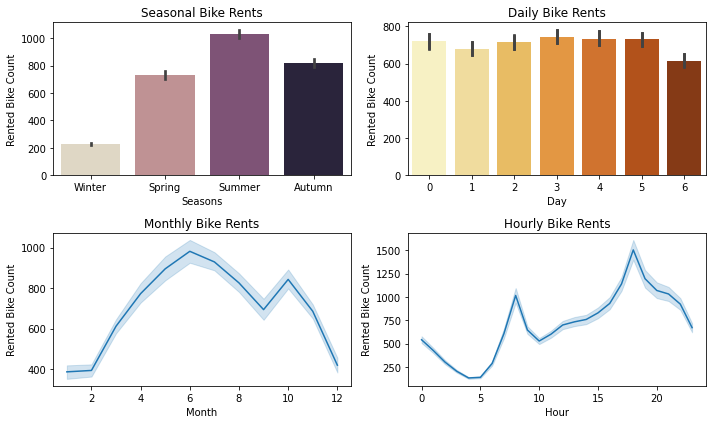

In [ ]:
x = [['Seasons', 'Day'], ['Month', 'Hour']]
title = [['Seasonal Bike Rents', 'Daily Bike Rents'], 
         ['Monthly Bike Rents', 'Hourly Bike Rents']]

f, ax = plt.subplots(2,2,figsize=(10,6))

for i in range(2):
    for j in range(2):
        if i==0:
            sns.barplot(data=df, x=x[i][j], y='Rented Bike Count', ax=ax[i][j], palette='ch:s=-.2,r=.6')
            if j==1:
                sns.barplot(data=df, x=x[i][j], y='Rented Bike Count', ax=ax[i][j], palette='YlOrBr')

        else:
            sns.lineplot(data=df, x=x[i][j], y='Rented Bike Count', ax=ax[i][j])

        ax[i][j].set_title(title[i][j])

plt.tight_layout()

In [ ]:
df.describe().columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Day',
       'Month', 'Year'],
      dtype='object')

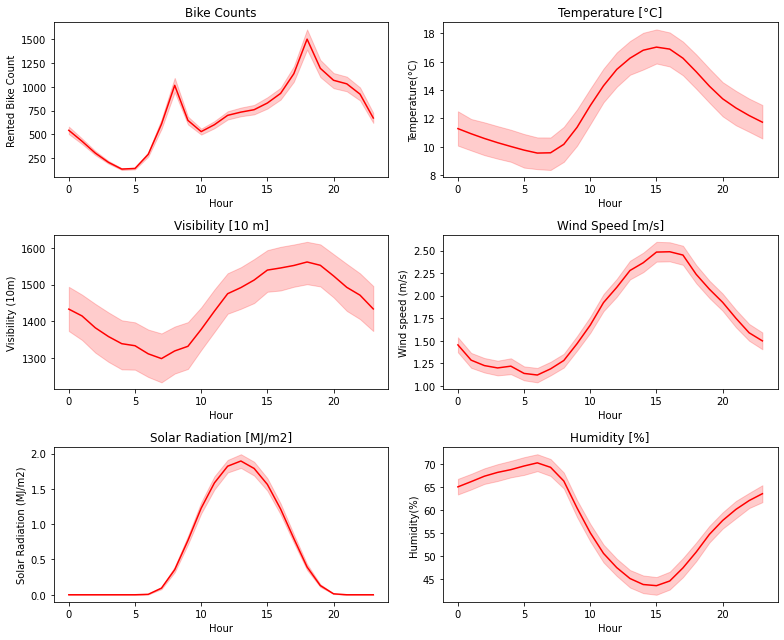

In [ ]:
y = [['Rented Bike Count', 'Temperature(°C)'], ['Visibility (10m)', 'Wind speed (m/s)'], ['Solar Radiation (MJ/m2)', 'Humidity(%)']]
title = [['Bike Counts', 'Temperature [°C]'], ['Visibility [10 m]', 'Wind Speed [m/s]'], 
         ['Solar Radiation [MJ/m2]', 'Humidity [%]']]

f, ax = plt.subplots(3,2,figsize=(11,9))

for i in range(3):
    for j in range(2):
        sns.lineplot(data=df, x='Hour', y=y[i][j], ax=ax[i][j], color='r')
        ax[i][j].set_title(title[i][j])

plt.tight_layout()

###The hourly movement of bike counts seems to correlate with temperature, visibility, windspeed, and humidity. The bike counts peak in the afternoon (from 15.00 to 20.00) where temperature is the highest, with the most visibility, windspeed, and least humidity.

In [ ]:
df.groupby(['Holiday','Rented Bike Count']).sum().reset_index()

,Holiday,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day,Month,Year
0,Holiday,0,276,360.0,1263,27.3,47822,120.2,8.89,0.0,0.0,0,216,48432
1,Holiday,3,16,9.3,183,2.0,190,6.7,0.00,6.4,0.0,12,24,4034
2,Holiday,4,30,13.5,278,3.1,586,10.1,0.11,9.5,0.0,18,36,6051
3,Holiday,7,13,3.7,90,0.7,744,2.2,0.15,0.0,0.0,6,12,2017
4,Holiday,9,11,4.6,95,0.8,156,3.8,0.05,0.0,0.0,6,12,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2476,No Holiday,3380,18,24.4,48,1.9,1998,12.6,0.56,0.0,0.0,4,4,2018
2477,No Holiday,3384,18,27.0,55,3.1,1246,17.1,1.26,0.0,0.0,2,6,2018
2478,No Holiday,3404,18,24.9,53,3.6,2000,14.6,1.28,0.0,0.0,3,12,2018
2479,No Holiday,3418,18,27.8,43,3.0,1933,14.0,1.35,0.0,0.0,3,6,2018


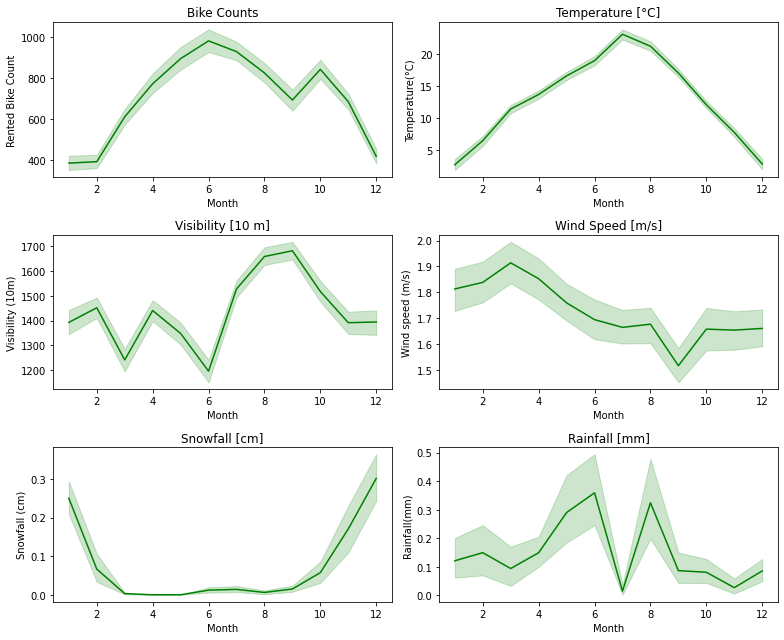

In [ ]:
y = [['Rented Bike Count', 'Temperature(°C)'], ['Visibility (10m)', 'Wind speed (m/s)'], ['Snowfall (cm)', 'Rainfall(mm)']]
title = [['Bike Counts', 'Temperature [°C]'], ['Visibility [10 m]', 'Wind Speed [m/s]'], 
         ['Snowfall [cm]', 'Rainfall [mm]']]

f, ax = plt.subplots(3,2,figsize=(11,9))

for i in range(3):
    for j in range(2):
        sns.lineplot(data=df, x='Month', y=y[i][j], ax=ax[i][j], color='green')
        ax[i][j].set_title(title[i][j])

plt.tight_layout()     

###The monthly movement of bike counts seems only to correlate with temperature. The movement of snowfall correlates with season i.e. high snowfall from January to March during winter season. However, there is a bizarre drop of rainfall in July. It seems there is no rain during the occassionally rainy season in July.

In [ ]:
# duplicate
len(df[df.duplicated()])

0

##Categorical EDA analysis

In [ ]:
categorical_features = df.describe(include=['object','category']).columns

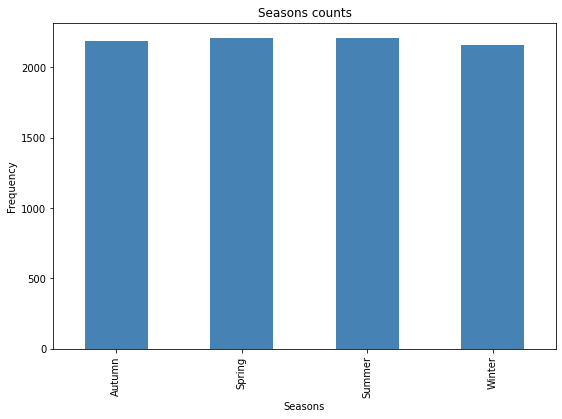

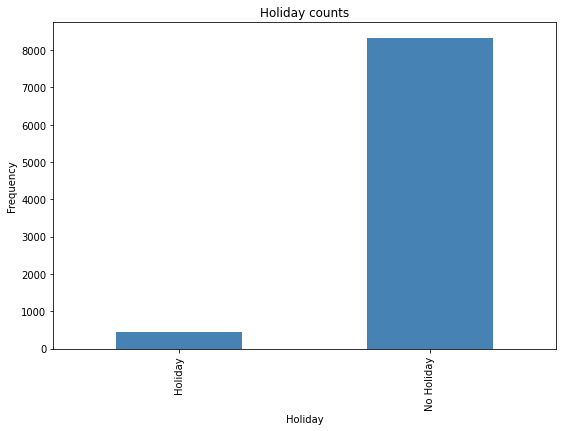

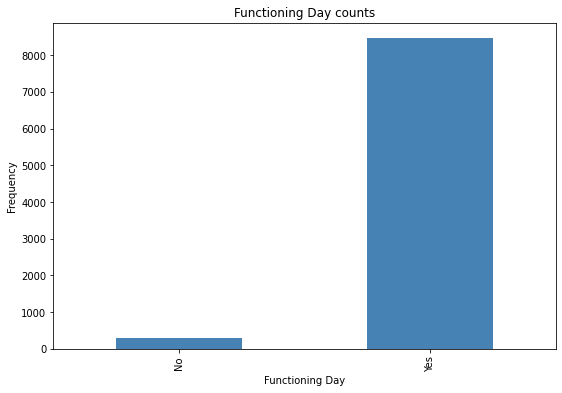

In [ ]:
for col in categorical_features:
    counts = df[col][1:].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

In [ ]:
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [ ]:
df.groupby(['Holiday','Rented Bike Count']).sum().reset_index()

,Holiday,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day,Month,Year
0,Holiday,0,276,360.0,1263,27.3,47822,120.2,8.89,0.0,0.0,0,216,48432
1,Holiday,3,16,9.3,183,2.0,190,6.7,0.00,6.4,0.0,12,24,4034
2,Holiday,4,30,13.5,278,3.1,586,10.1,0.11,9.5,0.0,18,36,6051
3,Holiday,7,13,3.7,90,0.7,744,2.2,0.15,0.0,0.0,6,12,2017
4,Holiday,9,11,4.6,95,0.8,156,3.8,0.05,0.0,0.0,6,12,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2476,No Holiday,3380,18,24.4,48,1.9,1998,12.6,0.56,0.0,0.0,4,4,2018
2477,No Holiday,3384,18,27.0,55,3.1,1246,17.1,1.26,0.0,0.0,2,6,2018
2478,No Holiday,3404,18,24.9,53,3.6,2000,14.6,1.28,0.0,0.0,3,12,2018
2479,No Holiday,3418,18,27.8,43,3.0,1933,14.0,1.35,0.0,0.0,3,6,2018


In [ ]:
Holiday_count = df.groupby("Holiday").sum()
Holiday_count

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day,Month,Year
Holiday,,,,,,,,,,,,,
Holiday,215895,4968,4298.3,23212,790.4,657366,106.2,237.49,33.7,22.0,1224,2760,871680
No Holiday,5956419,95772,108556.1,486850,14319.8,11929228,35580.4,4747.92,1268.8,635.6,25248,54408,16805256


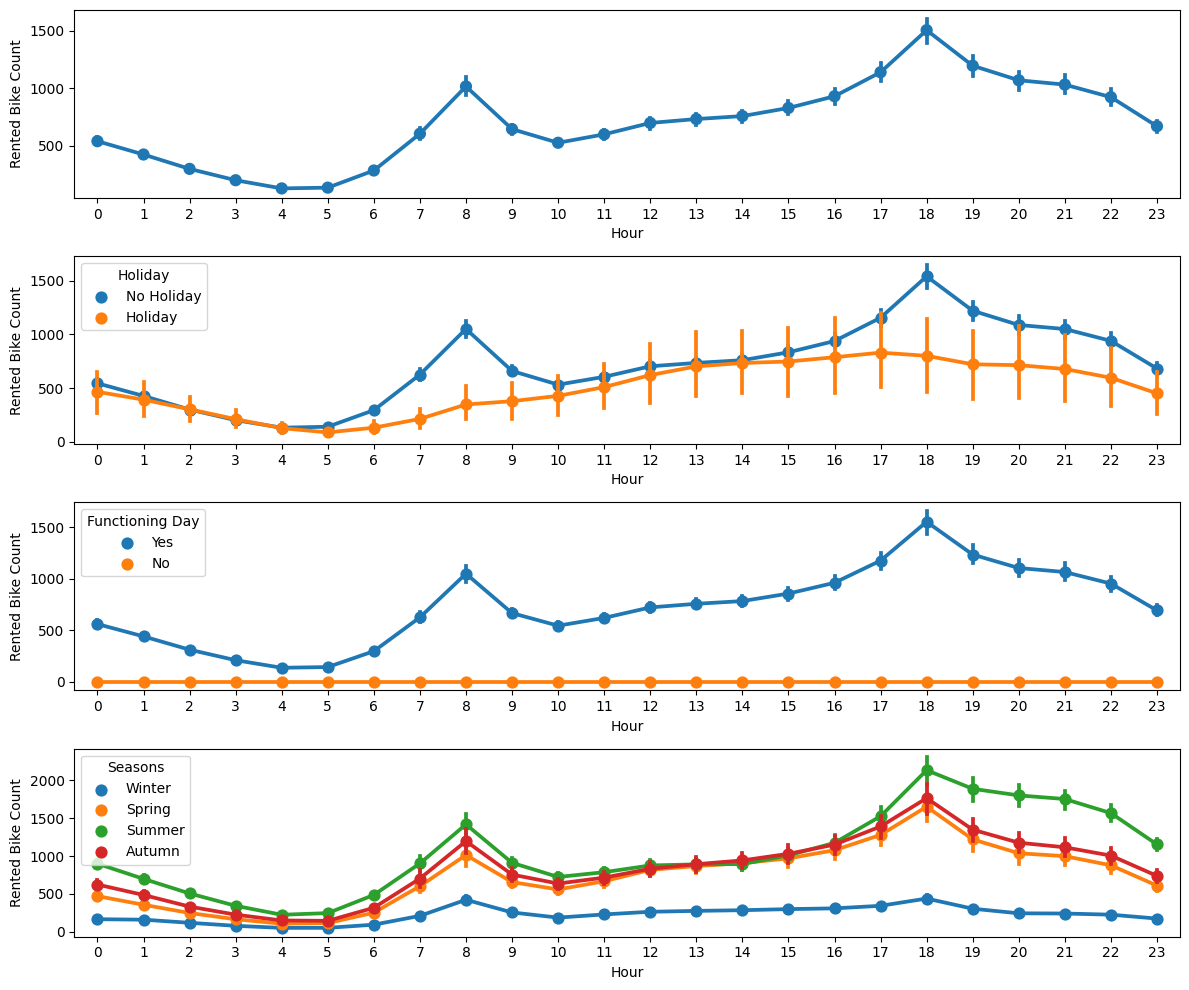

In [ ]:
# Line plot of Bike count vs hourly,functioning day And seasons
fig, axs = plt.subplots(nrows=4,ncols=1,figsize=(12,10), dpi=100)
sns.pointplot(data=df, x="Hour", y="Rented Bike Count", ax=axs[0])
sns.pointplot(data=df, x="Hour", y="Rented Bike Count", ax=axs[1], 
              hue="Holiday")
sns.pointplot(data=df, x="Hour", y="Rented Bike Count", ax=axs[2], 
              hue="Functioning Day")
sns.pointplot(data=df, x="Hour", y="Rented Bike Count", ax=axs[3], 
              hue="Seasons")
plt.tight_layout()

In [ ]:
def barplots(x,y,hue):
    plt.figure(figsize=(10,5))
    sns.barplot(x=x,y=y,hue=hue,data=df);


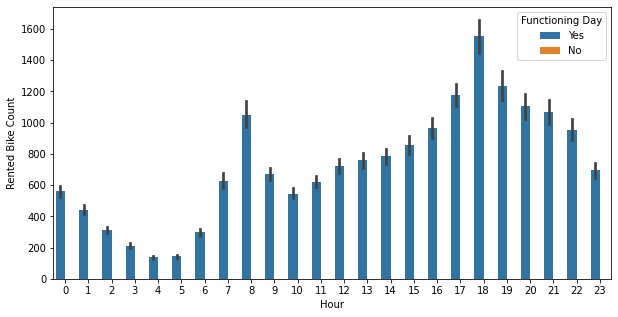

In [ ]:
barplots('Hour','Rented Bike Count','Functioning Day')

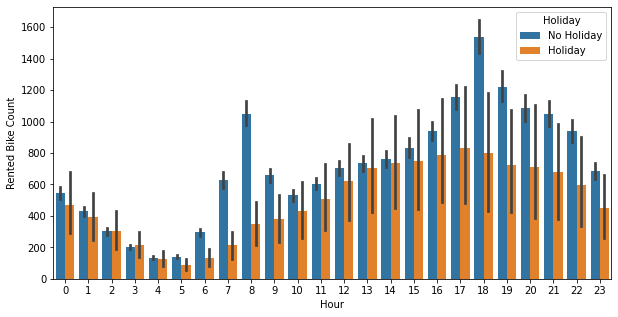

In [ ]:
barplots('Hour','Rented Bike Count','Holiday')

In [ ]:
categorical_features = df.describe(include=['object','category']).columns

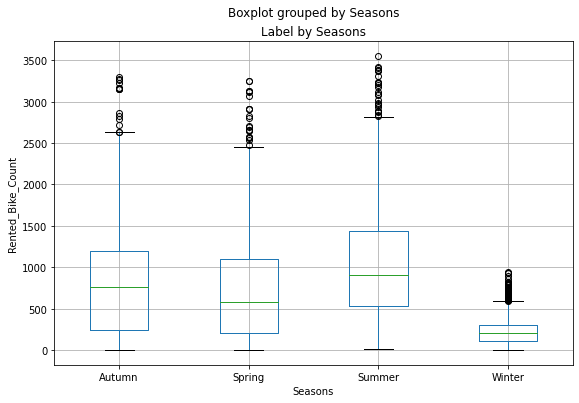

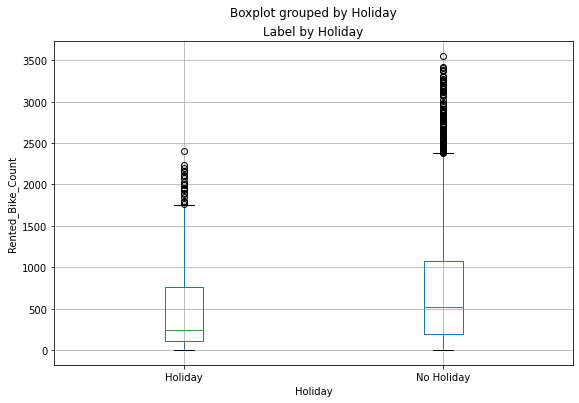

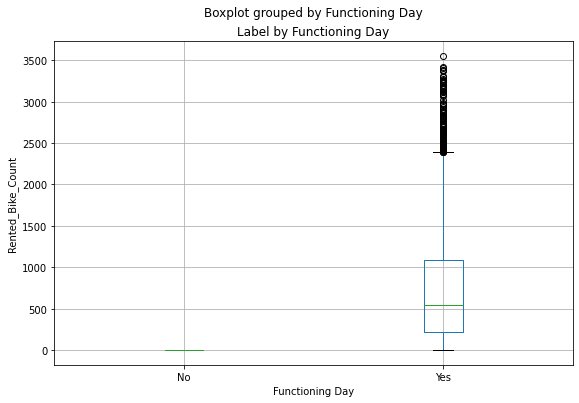

In [ ]:
#categorical features anlysis using box plot
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot(column = 'Rented Bike Count', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Rented_Bike_Count")
plt.show()

In [ ]:
data= df.copy()

In [ ]:
data.head(1)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,1,2017


In [ ]:
df.groupby(['Holiday','Rented Bike Count']).sum().reset_index()

,Holiday,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day,Month,Year
0,Holiday,0,276,360.0,1263,27.3,47822,120.2,8.89,0.0,0.0,0,216,48432
1,Holiday,3,16,9.3,183,2.0,190,6.7,0.00,6.4,0.0,12,24,4034
2,Holiday,4,30,13.5,278,3.1,586,10.1,0.11,9.5,0.0,18,36,6051
3,Holiday,7,13,3.7,90,0.7,744,2.2,0.15,0.0,0.0,6,12,2017
4,Holiday,9,11,4.6,95,0.8,156,3.8,0.05,0.0,0.0,6,12,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2476,No Holiday,3380,18,24.4,48,1.9,1998,12.6,0.56,0.0,0.0,4,4,2018
2477,No Holiday,3384,18,27.0,55,3.1,1246,17.1,1.26,0.0,0.0,2,6,2018
2478,No Holiday,3404,18,24.9,53,3.6,2000,14.6,1.28,0.0,0.0,3,12,2018
2479,No Holiday,3418,18,27.8,43,3.0,1933,14.0,1.35,0.0,0.0,3,6,2018


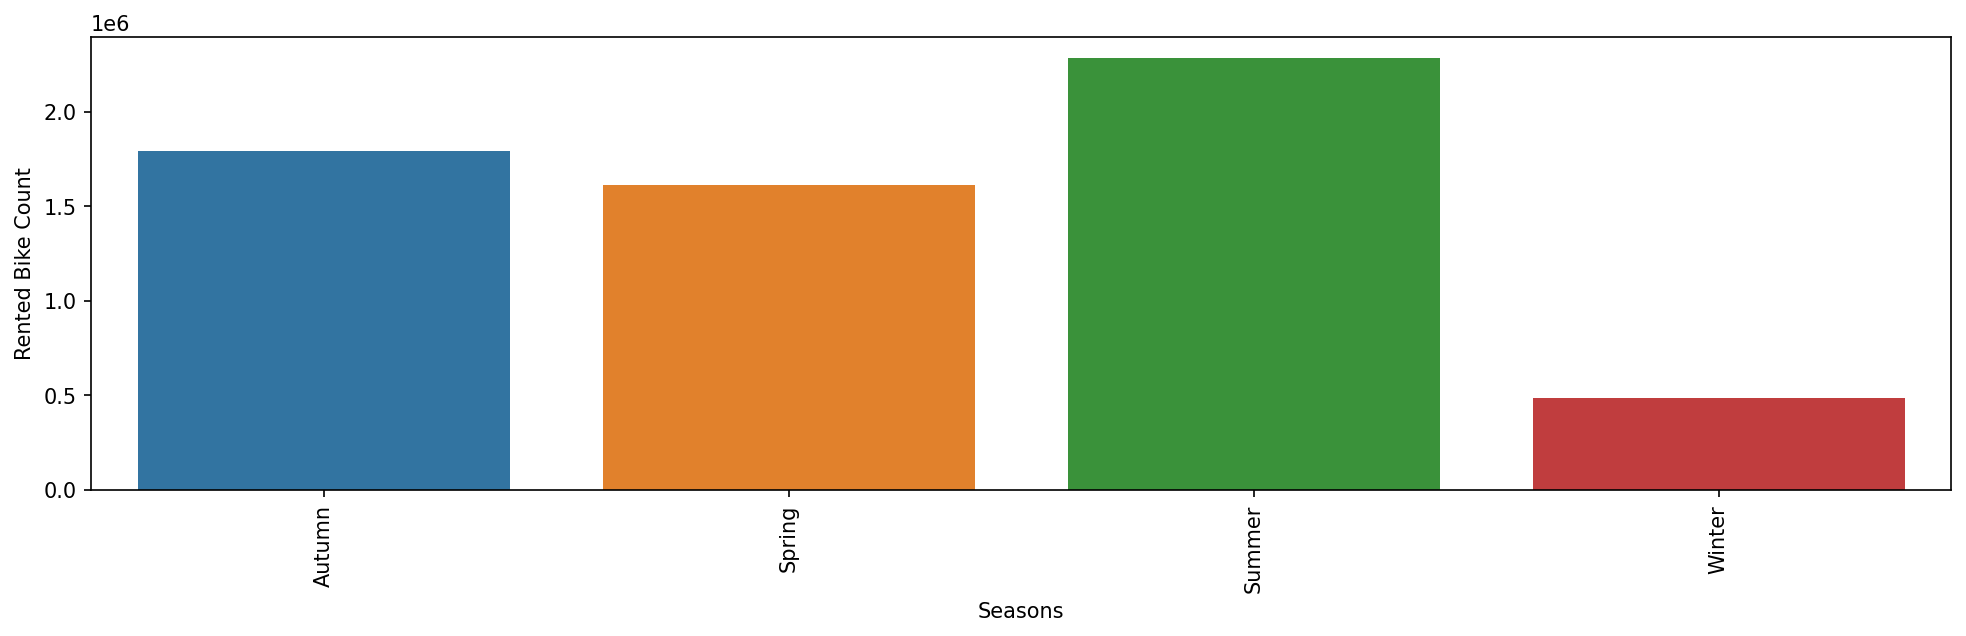

In [ ]:
Season = df.groupby("Seasons").sum().reset_index()
plt.figure(figsize=(16,4), dpi=150)
sns.barplot(x="Seasons", y="Rented Bike Count", data=Season)
plt.xticks(rotation=90);

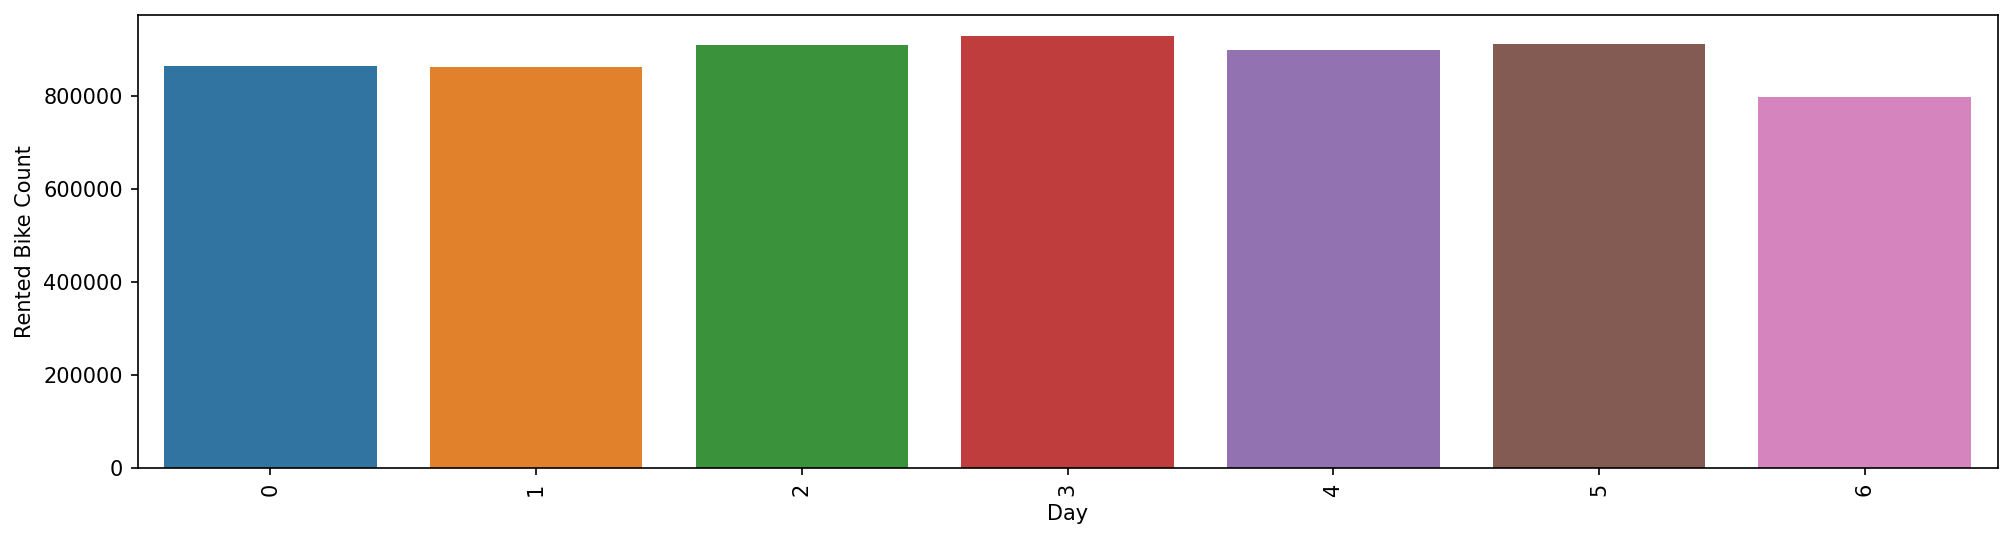

In [ ]:
Day = df.groupby("Day").sum().reset_index()
plt.figure(figsize=(16,4), dpi=150)
sns.barplot(x="Day", y="Rented Bike Count", data=Day)
plt.xticks(rotation=90);

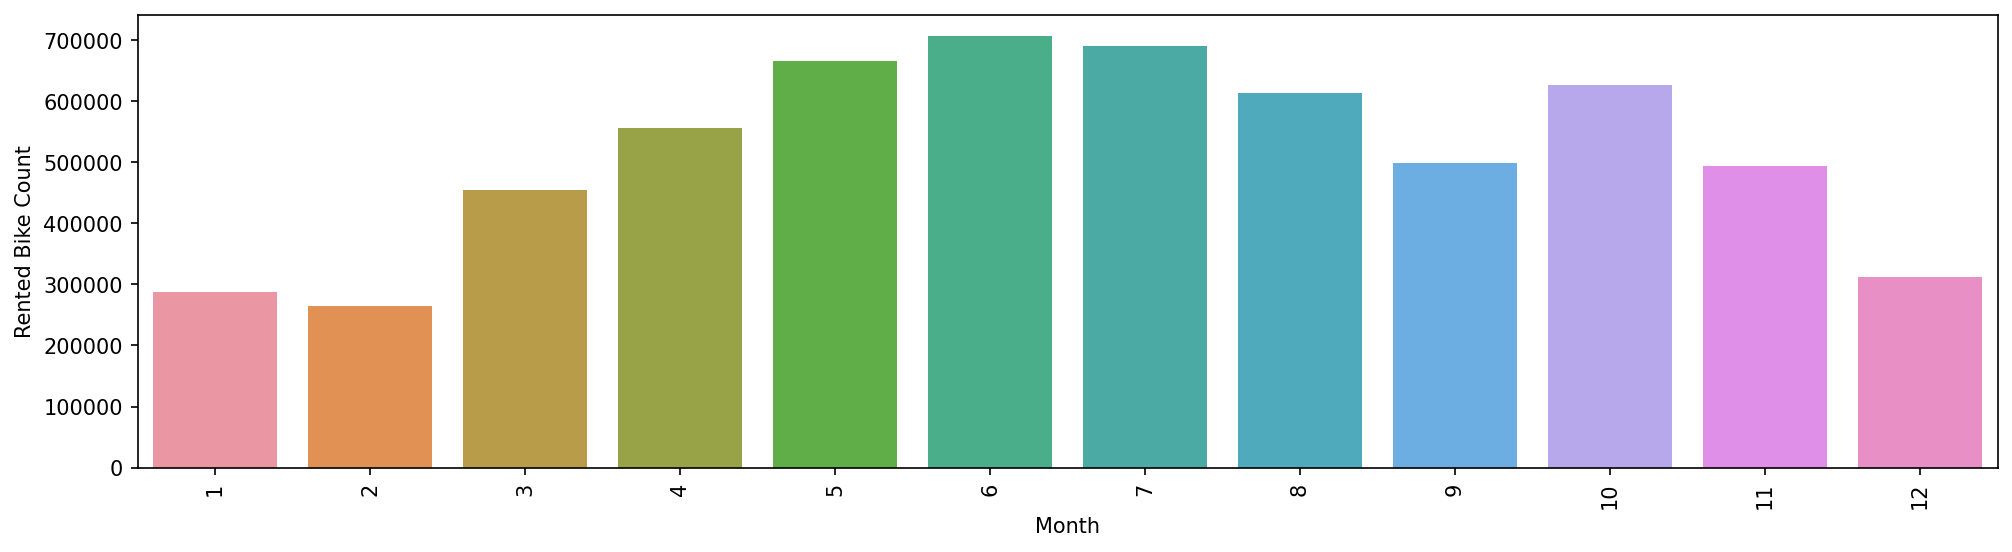

In [ ]:
Month = df.groupby("Month").sum().reset_index()
plt.figure(figsize=(16,4), dpi=150)
sns.barplot(x="Month", y="Rented Bike Count", data=Month)
plt.xticks(rotation=90);

##Feature engineering

In [ ]:
data= df.copy()

In [ ]:
#another method to make dummies
df = pd.get_dummies(data, columns = ['Seasons',	'Holiday',	'Functioning Day'])
df

In [ ]:
df.Seasons.unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [ ]:
#Mapping the Variables
df['Functioning_Day']=df['Functioning Day'].map({'Yes':1,'No':0})
df['IsHoliday']=df['Holiday'].map({'No Holiday':0,'Holiday':1})
df['numeric_season']=df['Seasons'].map({'Winter':1,'Spring':2,'Summer':3,'Autumn':4})

In [ ]:
#Drop date,Functioning day,holiday,Seasons
df.drop(['Date','Functioning Day','Holiday','Seasons'] ,axis=1, inplace=True)

In [ ]:
df.drop(['Dew point temperature(°C)'],axis=1, inplace=True)

In [ ]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day,Month,Year,Functioning_Day,IsHoliday,numeric_season
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,3,1,2017,1,0,1
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,3,1,2017,1,0,1
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,3,1,2017,1,0,1
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,3,1,2017,1,0,1
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,3,1,2017,1,0,1


In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,Hour,4.450506
1,Temperature(°C),4.827994
2,Humidity(%),23.665414
3,Wind speed (m/s),4.905972
4,Visibility (10m),10.719881
5,Solar Radiation (MJ/m2),2.753439
6,Rainfall(mm),1.089950
7,Snowfall (cm),1.132515
8,Day,3.296648
9,Month,5.484168


In [ ]:
#scaling data using MinMax_scalar
MinMax_scaler = MinMaxScaler(feature_range=(0, 1))
df['Rented Bike Count'] = MinMax_scaler.fit_transform(df['Rented Bike Count'].values.reshape(-1, 1))

In [ ]:
#Libraries for ML Analysis
from scipy.stats import uniform, randint
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error,mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
import xgboost as xgb

In [ ]:
y= df['Rented Bike Count']
X = df[['Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Day', 'Month', 'Year',
       'Functioning_Day'	,'IsHoliday'	,'numeric_season']]

In [ ]:
from scipy.stats import zscore
#Train test split
# numeric_cols = carprice.select_dtypes(include=[np.number]).columns
#X = X.apply(zscore)

In [ ]:
#y = np.log10(df['Rented Bike Count'])

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(7008, 14)
(1752, 14)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor

%config InlineBackend.figure_format = 'retina'

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_train, y_train)

0.5492959544327283

In [ ]:
reg.intercept_

18.395097067054014

In [ ]:
reg.coef_

array([ 7.92941714e-03,  7.36001752e-03, -2.21202555e-03,  5.71690427e-03,
       -1.12378935e-06, -2.14843842e-02, -1.76618058e-02,  2.55548983e-03,
       -1.92308242e-03,  1.21365639e-04, -9.20412080e-03,  2.61288026e-01,
       -3.87555060e-02,  3.17118130e-02])

In [ ]:
len(reg.coef_)

14

In [ ]:
y_pred_train = reg.predict(X_train)

In [ ]:
# Predicting the Test set results
y_pred = reg.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_pred)

0.015572467867863293

In [ ]:
# Train performance
math.sqrt(mean_squared_error(y_train, y_pred_train))

0.12173890950749484

In [ ]:
# Test performance
math.sqrt(mean_squared_error(y_test, y_pred))

0.12478969455793733

In [ ]:
r2_score(y_train, y_pred_train)

0.5492959544327283

In [ ]:
r2_score(y_test, y_pred)

0.5273784898963614

In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 0.5522455783951021
RMSE : 0.7431322751671482


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.40095707181968565
Adjusted R2 :  0.3961288616904258
